In [ ]:
22+2

24

In [ ]:
65+22

87

In [ ]:
51+22

73

MARKDOWN

In [ ]:
w = 99

In [ ]:
print(w)

99


In [ ]:
x=1

In [ ]:
x

1

In [ ]:
w + x

100

## Importar Librerias

In [ ]:
import pandas as pd #pandas sirve para ciencia de datos

In [ ]:
df_train = pd.read_csv('/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [ ]:
df_train[['Id','SalePrice']]

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [ ]:
df_train['SalePrice'].mean()

180921.19589041095

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Importando todas las librerias necesarias para el análisis...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #librerias para gráficas
import seaborn as sns #librerias para gráficas más profesionales
import numpy as np #libreria para métodos numéricas
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline 



Análisis de precios de ventas

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

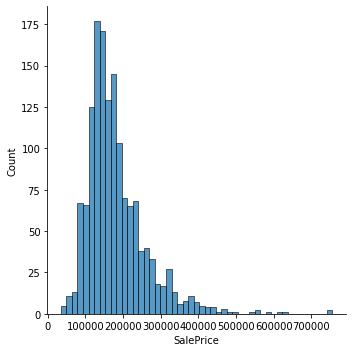

In [ ]:
sns.displot(df_train['SalePrice'])

In [ ]:
df_train['SalePrice'].skew()

1.8828757597682129

In [ ]:
df_train['SalePrice'].kurt()

6.536281860064529

In [ ]:
var = 'GrLivArea'

In [ ]:
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
print(data)

      SalePrice  GrLivArea
0        208500       1710
1        181500       1262
2        223500       1786
3        140000       1717
4        250000       2198
...         ...        ...
1455     175000       1647
1456     210000       2073
1457     266500       2340
1458     142125       1078
1459     147500       1256

[1460 rows x 2 columns]


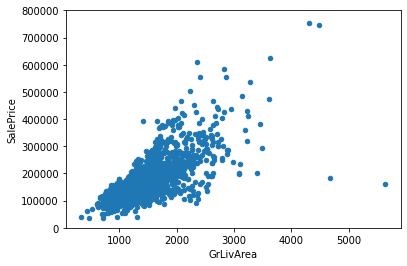

In [ ]:
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));

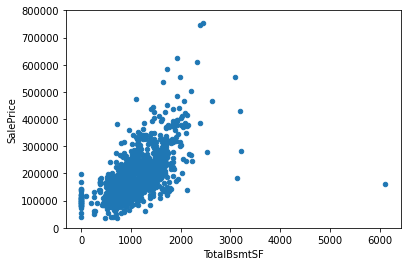

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [ ]:
var = 'OverallQual'

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


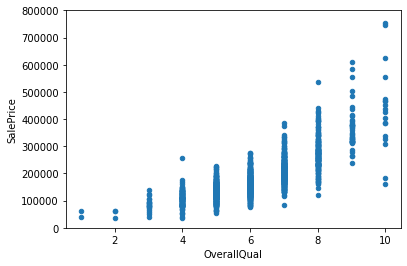

In [ ]:
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)

data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
data.head()

Text(0.5, 1.0, 'Boxplot')

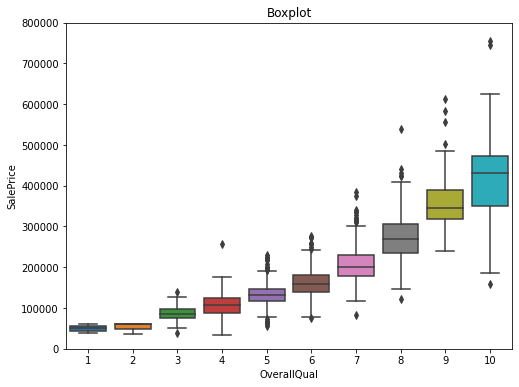

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data = data)
fig.axis(ymin=0,ymax=800000)
plt.title('Boxplot')

Lo mismo pero ahora con Precio de venta vs Año Construida

In [ ]:
var = 'YearBuilt'

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.head()

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

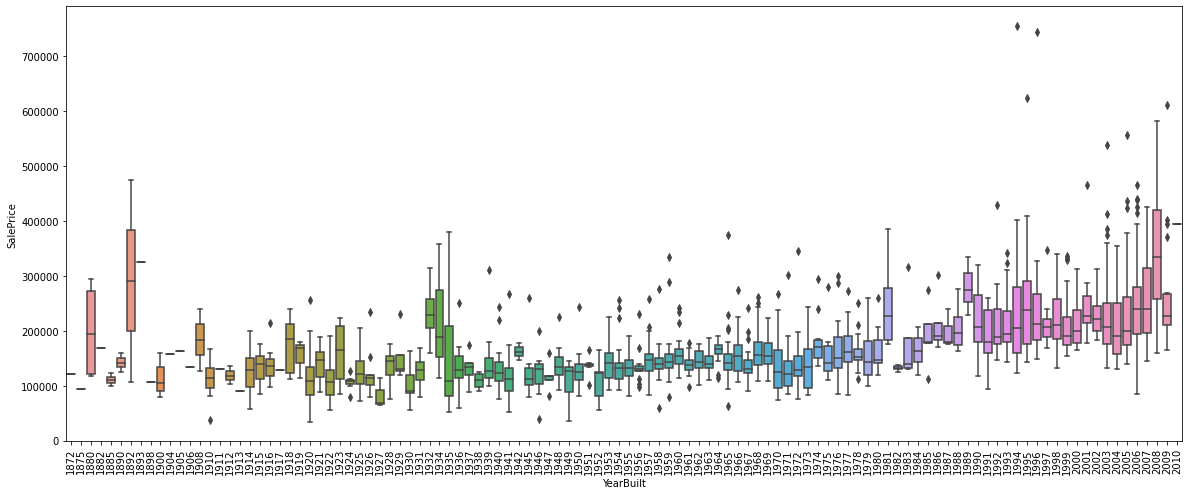

In [ ]:
f, ax = plt.subplots(figsize=(20,8))
fig= sns.boxplot(x=var,y='SalePrice',data=data)
plt.xticks(rotation=90)

Matriz de correlación

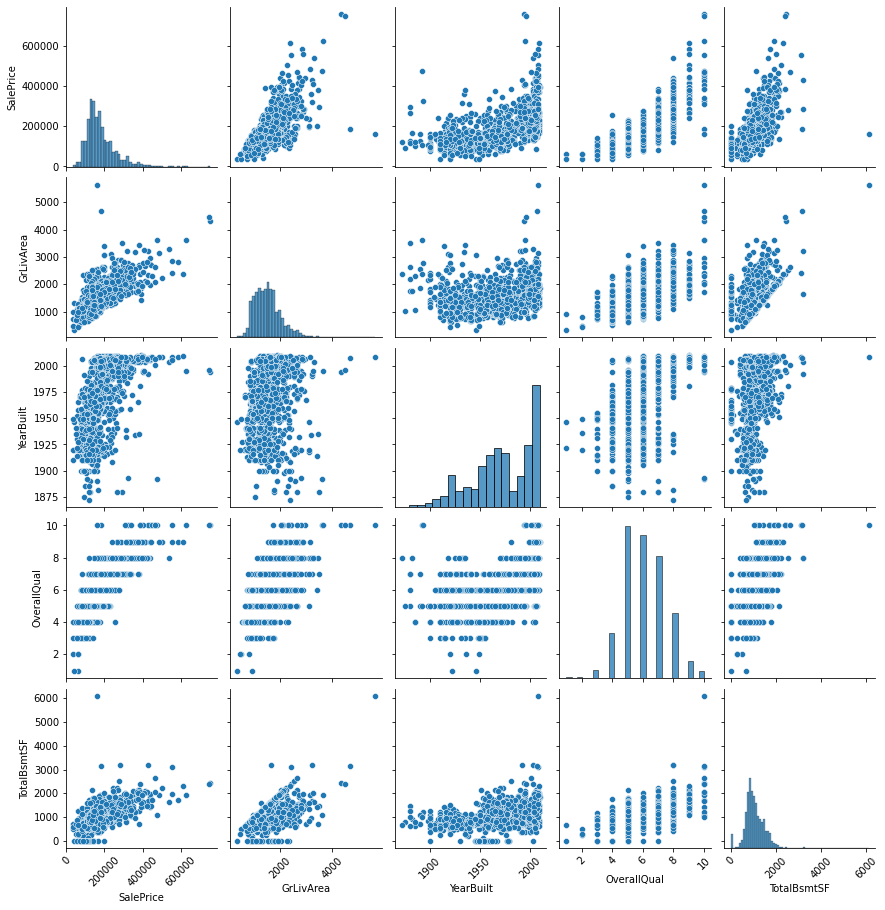

In [ ]:
Matrizdedispersion=df[["SalePrice", "GrLivArea","YearBuilt","OverallQual","TotalBsmtSF"]]
g=sns.pairplot(Matrizdedispersion,diag_kind="hist")
for ax in g.axes.flat:
     plt.setp(ax.get_xticklabels(), rotation=45)

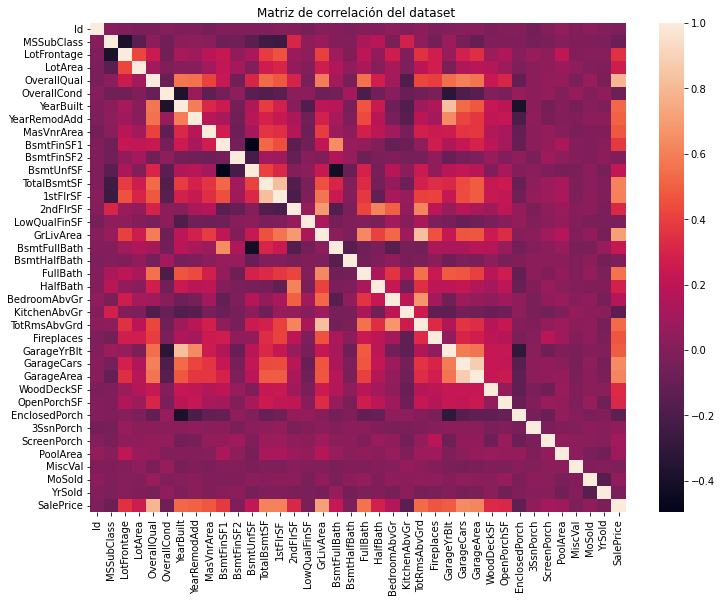

In [ ]:
f,ax = plt.subplots(figsize=(12,9))
correlation_mat = df_train.corr()
sns.heatmap(correlation_mat, annot = False) #annot me determina si mostrar o no el valor de correlacion
plt.title("Matriz de correlación del dataset ")
plt.savefig('Matriz de correlación del dataset.png')
plt.show()

Matriz de correlación con números

In [ ]:
k=10

In [ ]:
cols=correlation_mat.nlargest(k,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [ ]:
cm = np.corrcoef(df_train[cols].values.T)

In [ ]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

In [ ]:
sns.set(font_scale=1.25)

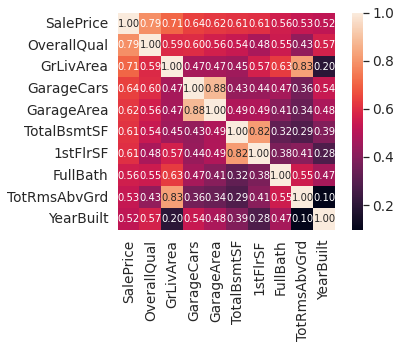

In [ ]:
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10,},yticklabels=cols.values,xticklabels=cols.values)

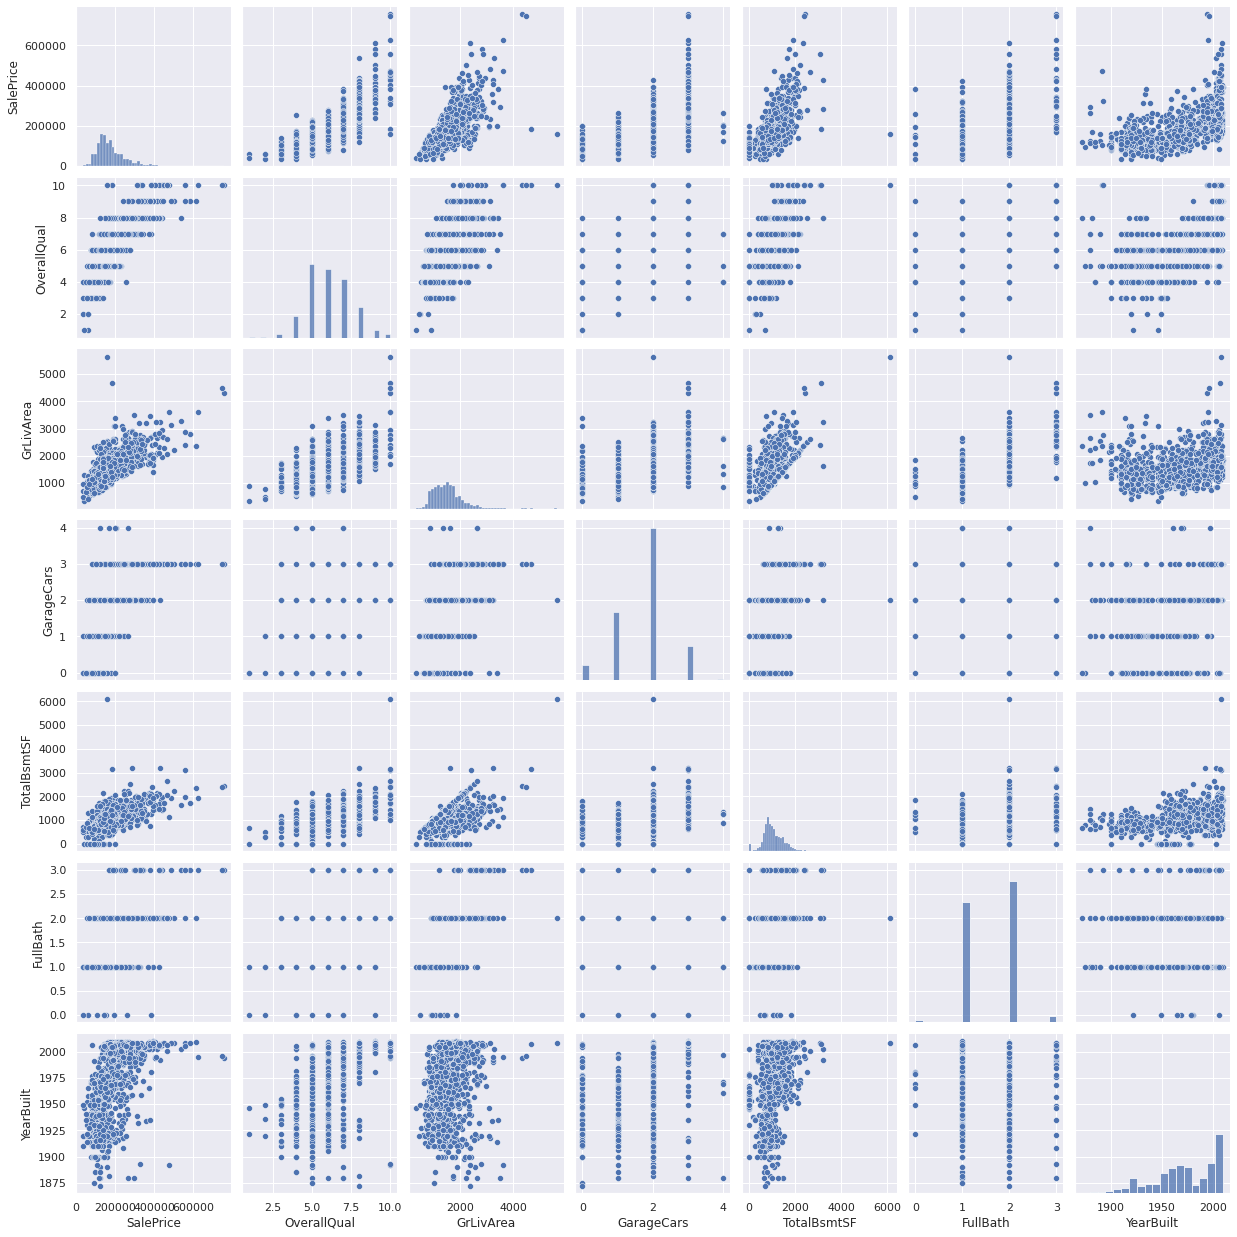

In [ ]:
sns.set()
cols=["SalePrice",'OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],height=2.5)
plt.show()